In [1]:
import pandas as pd
import numpy as np
from analysis_utils import *


In [2]:
PAREDAO = "paredao9"
CAND1_PATH = "data/paredao9/daniel_fica_fora.csv"
CAND2_PATH = "data/paredao9/flay_fica_fora.csv"
CAND3_PATH = "data/paredao9/ivy_fica_fora.csv"


In [3]:
candidate1_df = pd.read_csv(CAND1_PATH)
candidate2_df = pd.read_csv(CAND2_PATH)
candidate3_df = pd.read_csv(CAND3_PATH)

In [4]:
cand1 = candidate1_df[["tweet", "sentiment"]]
cand2 = candidate2_df[["tweet", "sentiment"]]
cand3 = candidate3_df[["tweet", "sentiment"]]

# Daniel (Eliminado)

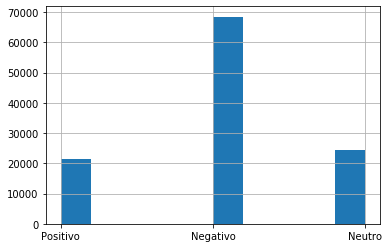

In [5]:
cand1["sentiment"].hist()

In [6]:
cand1

,tweet,sentiment
0,@bbb FLAY sapateou legal na sonsa #FicaDaniel,Positivo
1,⭕🍀 MUTIRÃO FEAT. @DanielLenhardt_ ENCERRADO 🍀⭕...,Negativo
2,@virginiafcunha É nada. #FicaDaniel,Negativo
3,"Em relação ao Daniel, vocês são: #BBB20 #RedeB...",Neutro
4,A gente vai ser #FicaDaniel ou #foradaniel ? \...,Negativo
...,...,...
114124,@rvore17 @PyongNews @DanielLenhardt_ @boninho ...,Negativo
114125,@DanielLenhardt_ Votando sem contar,Neutro
114126,Infância é uma coisa sem explicação http://t.c...,Negativo
114127,@DanielLenhardt_ @PyongNews Votando sem contar,Neutro


# Flayslene

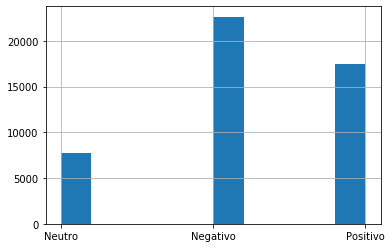

In [7]:
cand2["sentiment"].hist()

In [8]:
cand2

,tweet,sentiment
0,EU ESTOU COM A FLAY PORQUE EU NÃO SOU FI DE RA...,Neutro
1,👭🏻 MUTIRÃO MARILANE INICIADO 👭🏻 \n\n➡️ #ForaDa...,Negativo
2,👭🏻 MUTIRÃO MARILANE INICIADO 👭🏻 \n\n➡️ #ForaDa...,Negativo
3,CARALHO BABU DEPOIS DESSE DISCURSO A IVY FICOU...,Negativo
4,🎡 MUTIRÃO FLAYOR INICIADO 🎡\n\nFeat. @felipepr...,Negativo
...,...,...
47879,@SWS_Black7 @Anacarla_pb @laneeoficial Ao meu ...,Positivo
47880,@laneeoficial Nada que a Thelma não tenha fala...,Negativo
47881,👭 MUTIRÃO MARILANE INICIADO 👭\n\nFeat. @marigo...,Negativo
47882,👭 MUTIRÃO MARILANE INICIADO 👭\n\nFeat. @marigo...,Negativo


# Ivy

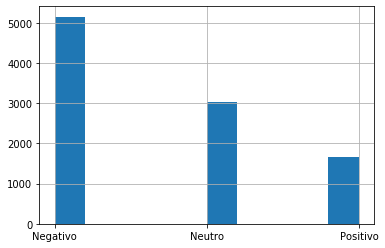

In [9]:
cand3["sentiment"].hist()

In [10]:
cand3

,tweet,sentiment
0,@Diegorodriguswm 🤦🏼‍♀️🤦🏼‍♀️🤦🏼‍♀️🤦🏼‍♀️🤦🏼‍♀️ bot...,Negativo
1,"Paredão Formado,Quem Sai?\n#BBB20 \n#RedeBBB \...",Negativo
2,@vaidesmaiar ta sendo #FicaIvy \n\né mole? hdu...,Negativo
3,@Marcell88967560 Perfil oficial da Ivy falando...,Neutro
4,@vaidesmaiar Só postaram a justificativa dela ...,Negativo
...,...,...
9827,"Prior não aguenta mais a Ivy, e eu também não ...",Negativo
9828,@gurgelfilho_ @ivymoraesb Gurgel é simplesment...,Negativo
9829,@chernogab @ivymoraesb Hahaha felizmente a mai...,Positivo
9830,@gurgelfilho_ @ivymoraesb Flávio Dino já te de...,Neutro


# Quantidades absolutas

In [11]:
candidates = {"daniel": cand1, "flayslene": cand2, "ivy": cand3}

In [12]:
qtds_df = get_raw_quantities(candidates)

In [13]:
qtds_df

,positivos,neutros,negativos
nome,,,
daniel,21393,24290,68446
flayslene,17482,7771,22631
ivy,1659,3020,5153


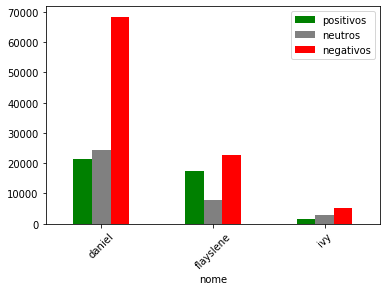

In [14]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação aos total de tweets de cada candidato

In [15]:
pcts_df = get_pct_by_candidate(candidates)

In [16]:
pcts_df

,positivos,neutros,negativos
nome,,,
daniel,0.187446,0.212829,0.599725
flayslene,0.365091,0.162288,0.472621
ivy,0.168735,0.307160,0.524105


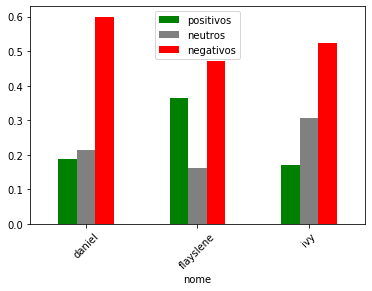

In [17]:
pcts_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação ao total de tweets por categoria

In [18]:
qtds_df_copy = qtds_df.copy()

In [19]:
qtds_df["positivos"] /= qtds_df["positivos"].sum() 
qtds_df["neutros"] /= qtds_df["neutros"].sum()
qtds_df["negativos"] /= qtds_df["negativos"].sum()

In [20]:
qtds_df

,positivos,neutros,negativos
nome,,,
daniel,0.527779,0.692398,0.711275
flayslene,0.431292,0.221516,0.235176
ivy,0.040929,0.086086,0.053549


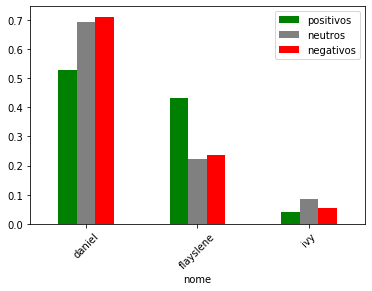

In [21]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Seleção de atributos

In [22]:
atributes_df = qtds_df_copy.join(pcts_df, rsuffix="_pct")

In [23]:
participantes_info = get_participantes_info()
paredoes_info = get_paredoes_info()

In [24]:
followers = [participantes_info[participante]["seguidores"] for participante in atributes_df.index]

In [25]:
paredao_info = paredoes_info[PAREDAO]["candidatos"]
results_info = {candidate["nome"]: candidate["porcentagem"]/100 for candidate in paredao_info}
rejection = [results_info[participante] for participante in atributes_df.index]

In [26]:
atributes_df["seguidores"], atributes_df["rejeicao"] = followers, rejection

In [27]:
atributes_df

,positivos,neutros,negativos,positivos_pct,neutros_pct,negativos_pct,seguidores,rejeicao
nome,,,,,,,,
daniel,21393,24290,68446,0.187446,0.212829,0.599725,33876,0.8082
flayslene,17482,7771,22631,0.365091,0.162288,0.472621,104138,0.0954
ivy,1659,3020,5153,0.168735,0.307160,0.524105,59125,0.0964


In [28]:
atributes_df.to_csv("data/{}/paredao_atributes.csv".format(PAREDAO))